In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
uploaded = files.upload()

Saving UK_foods.csv to UK_foods.csv


In [10]:
df = pd.read_csv('UK_foods.csv', index_col="Unnamed: 0")

In [11]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [12]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


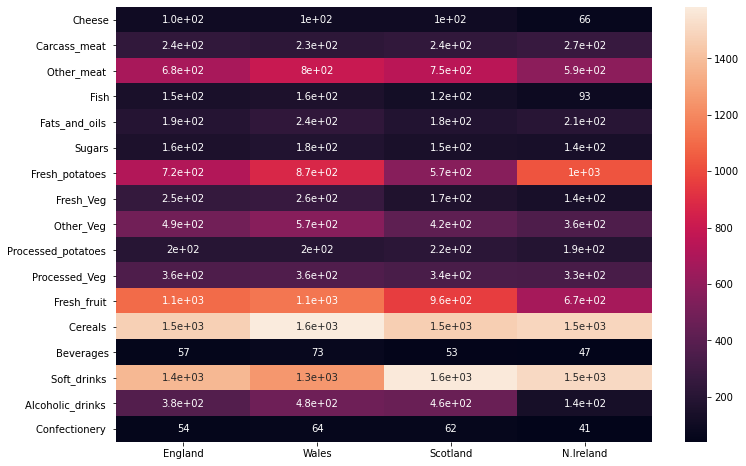

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df, annot=True)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [23]:
encoder = Sequential()
# 17-8-4-2 - 2 - 4 - 8 - 17
encoder.add(Dense(8, activation='relu', input_shape=[17]))
encoder.add(Dense(4, activation='relu'))
encoder.add(Dense(2, activation='relu'))

In [24]:
decoder = Sequential()
decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu'))
decoder.add(Dense(17, activation='relu'))

In [25]:
autoencoder = Sequential([encoder, decoder])

In [26]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [29]:
scaled_df.shape

(4, 17)

In [30]:
autoencoder.fit(scaled_df, scaled_df, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 2ms/step - loss: 0.4267
Epoch 2/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3791
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 4/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3285
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3156
Epoch 6/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3076
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2972
Epoch 11/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2967
Epoch 12/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 13/15
1/1 [==============================] - 0s 2ms/step - loss: 0.

In [50]:
encoded_2dim = encoder.predict(scaled_df)

In [51]:
encoded_2dim

array([[0.        , 0.3670965 ],
       [0.        , 0.5760296 ],
       [0.        , 0.6775308 ],
       [0.        , 0.30186847]], dtype=float32)

In [52]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [53]:
results = pd.DataFrame(data=encoded_2dim, index=df.transpose().index, columns=["C1", "C2"])

In [54]:
results = results.reset_index()

In [55]:
results

,index,C1,C2
0,England,0.0,0.367097
1,Wales,0.0,0.576030
2,Scotland,0.0,0.677531
3,N.Ireland,0.0,0.301868


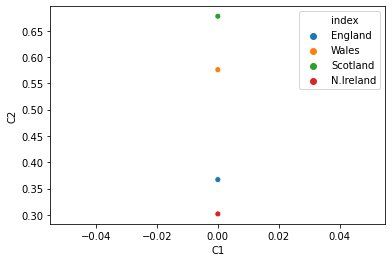

In [56]:
sns.scatterplot("C1", "C2", data=results, hue="index")